<a href="https://colab.research.google.com/github/ZPavlo/ClusteringComparing/blob/main/K_Medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import sys
import os
from google.colab import drive
drive.mount('/content/gdrive')
ROOT_DATA = '/content/gdrive/MyDrive/datasets/clustering_data'
sys.path.insert(0, '/content/gdrive/MyDrive/datasets')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!git clone https://github.com/ZPavlo/ClusteringComparing.git
sys.path.append("ClusteringComparing")

In [ ]:
!cd SignClassifier && git pull

# Clustering algorithms comparison

Algorithms:
* K-Medoids
* Mean-Shift Clustering
* Spectral clustering
* Clustering using Representatives (CURE)
* EM clustering
* HDBSCAN

In [ ]:
!pip install sklearn_extras
!pip install scikit-learn-extra

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

## Datasets

In [ ]:
from tools import make_plot

### Gaussian blobs

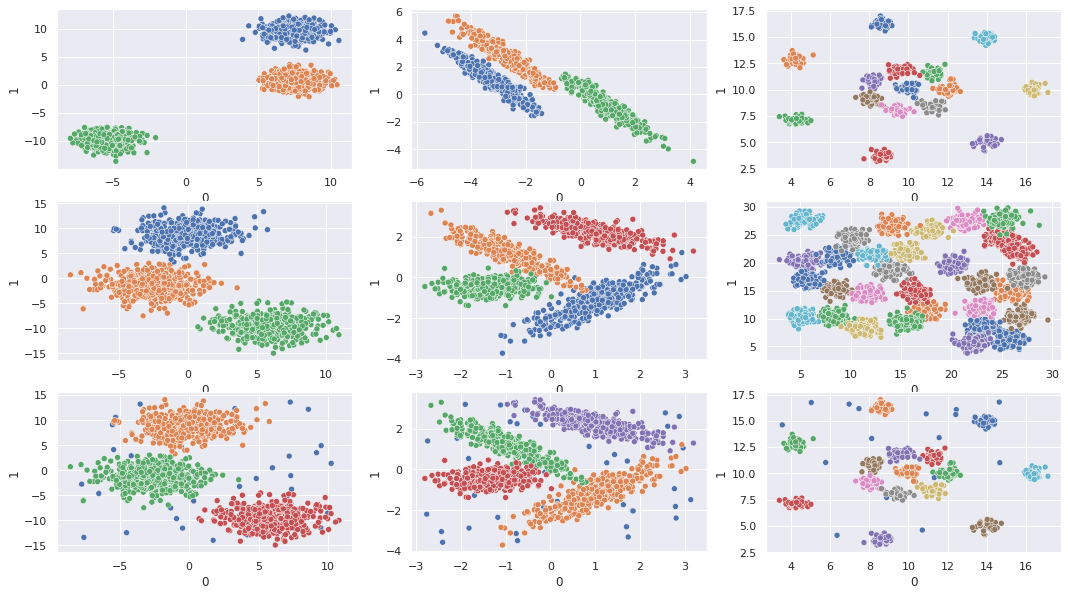

In [ ]:
from datasets import get_data_blobs, get_data_blobs2, get_data_blobs3, \
                     get_data_blobs4, get_data_R15, get_data_d31, get_gaussian_data_3d, \
                     get_data_blobs2_noise, get_data_blobs4_noise, get_data_R15_noise, \
                     GAUSSIAN_BLOBS_DATA

fig, axes = plt.subplots(3, 3, figsize=(18, 10))

make_plot(*get_data_blobs(), axes=axes[0, 0])
make_plot(*get_data_blobs3(), axes=axes[0, 1])
make_plot(*get_data_R15(path=ROOT_DATA), axes=axes[0, 2])

make_plot(*get_data_blobs2(), axes=axes[1, 0])
make_plot(*get_data_blobs4(), axes=axes[1, 1])
make_plot(*get_data_d31(path=ROOT_DATA), axes=axes[1, 2])

make_plot(*get_data_blobs2_noise(), axes=axes[2, 0])
make_plot(*get_data_blobs4_noise(), axes=axes[2, 1])
make_plot(*get_data_R15_noise(path=ROOT_DATA), axes=axes[2, 2])

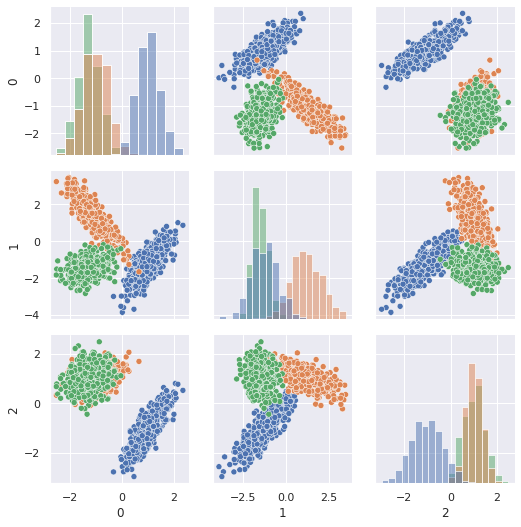

In [ ]:
X, y = get_gaussian_data_3d()

df = pd.DataFrame(data=X)
df["cluster"] = y

g = sns.PairGrid(df, hue="cluster", palette="deep")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

### Unbalance Gaussian

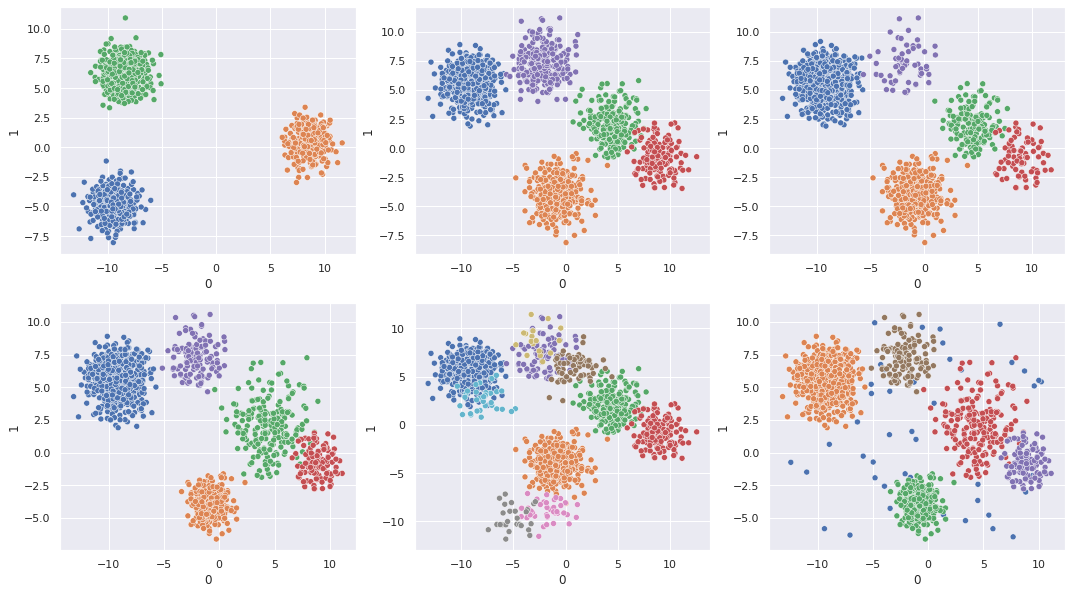

In [ ]:
from datasets import get_data_unbalance1, get_data_unbalance2, get_data_unbalance3, \
                     get_data_unbalance4, get_data_unbalance5, get_data_unbalance6, \
                     UNBALANCED_GAUSSIAN_BLOBS_DATA

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

make_plot(*get_data_unbalance1(), axes=axes[0, 0])
make_plot(*get_data_unbalance2(), axes=axes[0, 1])
make_plot(*get_data_unbalance3(), axes=axes[0, 2])
make_plot(*get_data_unbalance4(), axes=axes[1, 0])
make_plot(*get_data_unbalance5(), axes=axes[1, 1])
make_plot(*get_data_unbalance6(), axes=axes[1, 2])

### Cube 

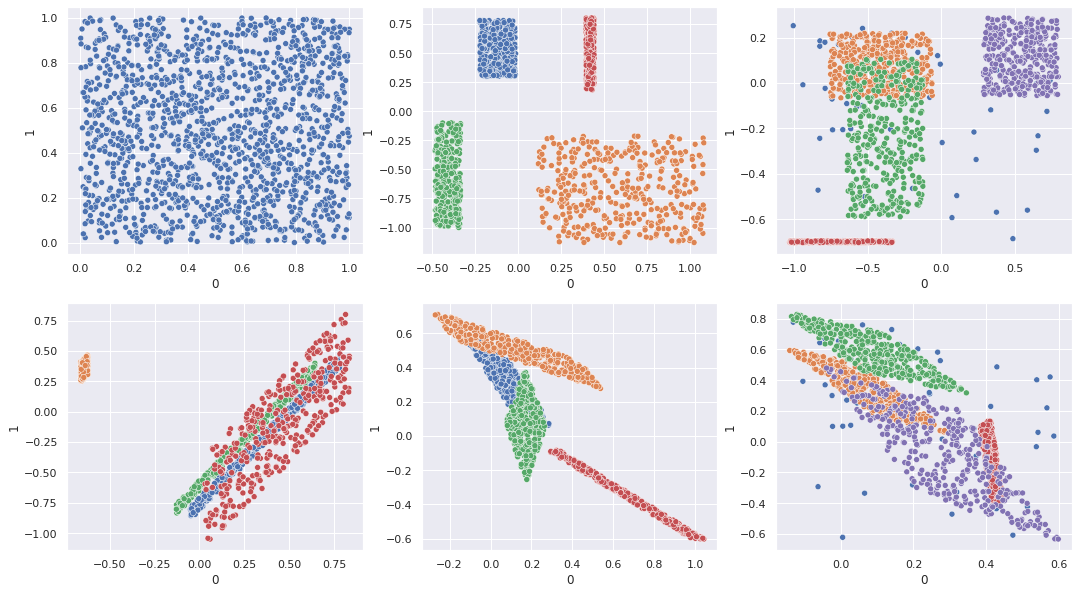

In [ ]:
from datasets import get_data_cube, get_data_cube2, get_data_cube3, \
                     get_data_cube4, get_data_cube5, get_data_cube6, \
                     get_data_cube_3d, CUBES_RECT_PARALLEL_DATA

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

make_plot(*get_data_cube(), axes=axes[0, 0])
make_plot(*get_data_cube2(), axes=axes[0, 1])
make_plot(*get_data_cube3(), axes=axes[1, 0])
make_plot(*get_data_cube4(), axes=axes[1, 1])
make_plot(*get_data_cube5(), axes=axes[0, 2])
make_plot(*get_data_cube6(), axes=axes[1, 2])

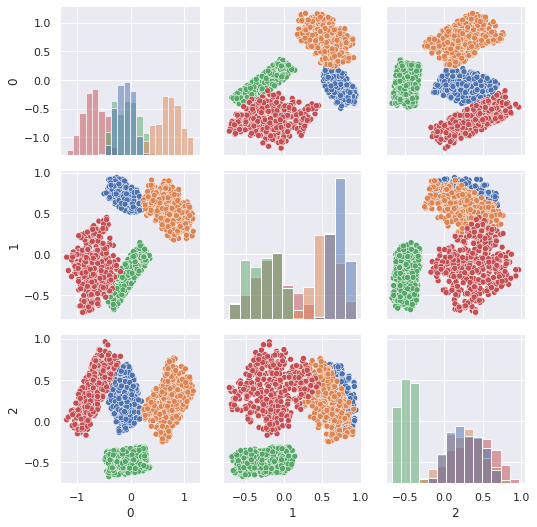

In [ ]:
X, y = get_data_cube_3d()

df = pd.DataFrame(data=X)
df["cluster"] = y

g = sns.PairGrid(df, hue="cluster", palette="deep")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()

### Non-spherical

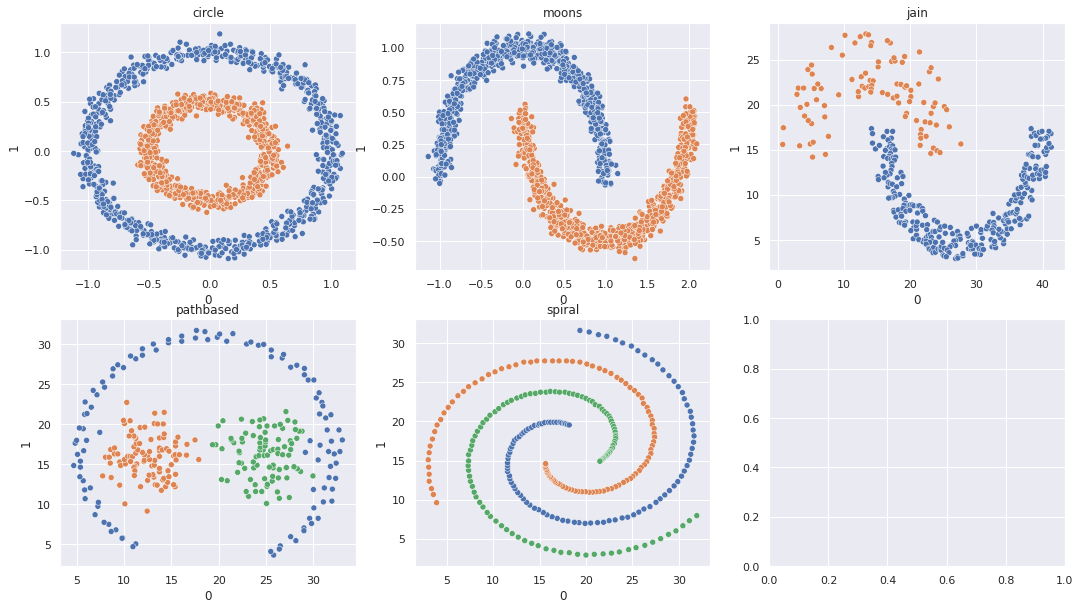

In [ ]:
from datasets import get_data_circle, get_data_moons, get_data_jain, \
                     get_data_pathbased, get_data_spiral, NON_SPHERICAL_DATA

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

make_plot(*get_data_circle(), axes=axes[0, 0], title="circle")
make_plot(*get_data_moons(), axes=axes[0, 1], title="moons")
make_plot(*get_data_jain(path=ROOT_DATA), axes=axes[0, 2], title="jain")
make_plot(*get_data_pathbased(path=ROOT_DATA), axes=axes[1, 0], title="pathbased")
make_plot(*get_data_spiral(path=ROOT_DATA), axes=axes[1, 1], title="spiral")

### Other forms

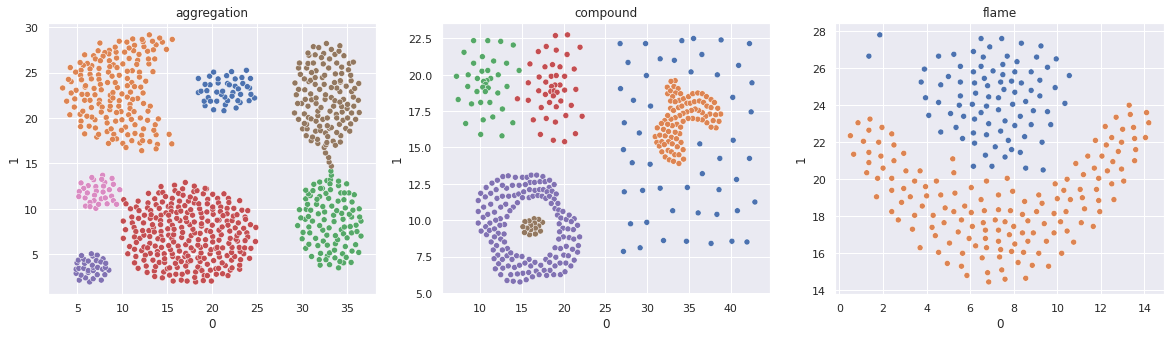

In [ ]:
from datasets import get_data_aggregation, get_data_compound, get_data_flame, \
                     get_data_cube, OTHER_FORMS_DATA



fig, axes = plt.subplots(1, 3, figsize=(20, 5))

make_plot(*get_data_aggregation(path=ROOT_DATA), axes=axes[0], title="aggregation")
make_plot(*get_data_compound(path=ROOT_DATA), axes=axes[1], title="compound")
make_plot(*get_data_flame(path=ROOT_DATA), axes=axes[2], title="flame")

### Real dataset (Iris)

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()
iris_labels = iris.target
data = pd.DataFrame(iris.data,columns = iris.feature_names)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCA_iris_data = pd.DataFrame(data = principalComponents , columns = ['pc1', 'pc2','pc3'])

PCA_iris_data.head()

,pc1,pc2,pc3
0,-0.630703,0.107578,-0.018719
1,-0.622905,-0.104260,-0.049142
2,-0.669520,-0.051417,0.019644
3,-0.654153,-0.102885,0.023219
4,-0.648788,0.133488,0.015116


## K-medoids

In [ ]:
import numpy as np

from kmedoids_utils import run_KMedoids_on_data_with_K, run_KMedoids_on_data, run_on_3d_data

### Gaussian blobs

In [ ]:
K = [3, 3, 3, 4, 15, 31, 3, 4, 15]

run_KMedoids_on_data_with_K(GAUSSIAN_BLOBS_DATA, K)

In [ ]:
run_KMedoids_on_data(GAUSSIAN_BLOBS_DATA, list(range(2, 45)))

In [ ]:
X, y = get_gaussian_data_3d()

run_on_3d_data(X, y, 5)

### Unbalance Gaussian

In [ ]:
K = [3, 5, 5, 5, 9, 5]

run_KMedoids_on_data_with_K(UNBALANCED_GAUSSIAN_BLOBS_DATA, K)

In [ ]:
run_KMedoids_on_data(UNBALANCED_GAUSSIAN_BLOBS_DATA, list(range(2, 20)))

### Cube

In [ ]:
K = [2, 4, 4, 4, 4, 4]

run_KMedoids_on_data_with_K(CUBES_RECT_PARALLEL_DATA, K)

In [ ]:
run_KMedoids_on_data(CUBES_RECT_PARALLEL_DATA, list(range(2, 20)))

In [ ]:
X, y = get_data_cube_3d()

run_on_3d_data(X, y, 4)

### Non-spherical

In [ ]:
K = [2, 2, 2, 2, 3, 3]

run_KMedoids_on_data_with_K(NON_SPHERICAL_DATA, K)

In [ ]:
run_KMedoids_on_data(NON_SPHERICAL_DATA, list(range(2, 20)))

### Other forms

In [ ]:
K = [7, 6, 2]

run_KMedoids_on_data_with_K(OTHER_FORMS_DATA, K)

In [ ]:
run_KMedoids_on_data(OTHER_FORMS_DATA, list(range(2, 20)))

### Real dataset (Iris)


In [ ]:
run_on_3d_data(PCA_iris_data.values, iris_labels, 3)